# Quant Trading Project

Rishabh Misra

---

In [1]:
import alpaca_trade_api as tradeapi


In [2]:
# Playing around with ALPACA

api = tradeapi.REST('PK42V8WYPH6UO0W2VEYU', 'vZHd5tb55JBjTiuptbgV6T6SNPxFD0UTXUSArXU2', base_url='https://paper-api.alpaca.markets')

In [3]:
twtr = api.list_positions()[0]
twtr.symbol

'TWTR'

In [4]:
import livetrading

In [5]:
livetrading.get_account()

Account({   'account_blocked': False,
    'account_number': 'PA2UT2J8B4P6',
    'buying_power': '390586.6',
    'cash': '91094.8',
    'created_at': '2021-01-05T05:46:35.504262Z',
    'currency': 'USD',
    'daytrade_count': 2,
    'daytrading_buying_power': '390586.6',
    'equity': '100065.7',
    'id': 'e5d9f20b-cfcd-4b7d-8580-23119ba6e039',
    'initial_margin': '4722',
    'last_equity': '100000',
    'last_maintenance_margin': '0',
    'long_market_value': '9207.45',
    'maintenance_margin': '2833.2',
    'multiplier': '4',
    'pattern_day_trader': False,
    'portfolio_value': '100065.7',
    'regt_buying_power': '190687.4',
    'short_market_value': '-236.55',
    'shorting_enabled': True,
    'sma': '0',
    'status': 'ACTIVE',
    'trade_suspended_by_user': False,
    'trading_blocked': False,
    'transfers_blocked': False})

In [121]:
# api.submit_order(
#     symbol='TWTR',
#     side='sell',
#     qty='5',
#     type='market',
#     time_in_force='gtc'
# )

Order({   'asset_class': 'us_equity',
    'asset_id': '2e91ded3-a6d8-423f-bbf0-e0a7f29b88ce',
    'canceled_at': None,
    'client_order_id': '33fa4738-4ac9-44b3-bb76-58cdc4308f3b',
    'created_at': '2021-01-12T17:22:21.816246Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': 'e3f2db65-ff75-4291-b9c9-d641b9ce2c98',
    'legs': None,
    'limit_price': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '5',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'sell',
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2021-01-12T17:22:21.804961Z',
    'symbol': 'TWTR',
    'time_in_force': 'gtc',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2021-01-12T17:22:21.816246Z'})

In [22]:
import algorithms.mfi

In [23]:
algorithms.mfi.hi()

hi


### Setting up Alpha Vantage

Library that will help obtain:
* Stock Time Series Data
* Fundamental Data (Accounting, etc.)
* Forex Data
* Cryptocurrencies Data
* **Numerous** technical indicators

In [1]:
import utility

In [2]:
intradayparams = {
    'symbol': 'AAPL',
    'interval' : '5min'
}
today_appl = utility.av_call('TIME_SERIES_INTRADAY', intradayparams)

### Simple Moving Averages

Calculating simple moving averages using month data from Alpha Vantage

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Calling AV API to get
monthparams = {
    'symbol': 'AAPL',
}
monthappl = av_call("TIME_SERIES_MONTHLY_ADJUSTED", monthparams)

In [ ]:
appltime = monthappl['Monthly Adjusted Time Series']

In [ ]:
applmonth = pd.DataFrame(appltime).T
applmonth.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
2000-04-28,135.5000,139.5000,104.8700,124.0600,0.9554,77342900,0.0000
2000-03-31,118.5600,150.3800,114.0000,135.8100,1.0459,77663900,0.0000
2000-02-29,104.0000,119.9400,97.0000,114.6200,0.8827,65355200,0.0000
2000-01-31,104.8700,121.5000,86.5000,103.7500,0.7990,112099800,0.0000
1999-12-31,101.0000,118.0000,91.0600,102.8100,0.7918,84091200,0.0000


In [ ]:
# Minor modifications to make table more usable
applmonth = applmonth.reset_index()
applmonth = applmonth.rename(columns = {'index':'date'})
applmonth.head()

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
0,2021-01-08,133.5200,133.6116,126.3820,132.0500,132.0500,610791157,0.0000
1,2020-12-31,121.0100,138.7890,120.0100,132.6900,132.6900,2319687808,0.0000
2,2020-11-30,109.1100,121.9900,107.3200,119.0500,119.0500,2122724412,0.2050
3,2020-10-30,117.6400,125.3900,107.7200,108.8600,108.6723,2895317580,0.0000
4,2020-09-30,132.7600,137.9800,103.1000,115.8100,115.6103,3886793083,0.0000


In [ ]:
# Reverse dataframe so it's in chronological order
applmonth = applmonth.iloc[::-1]
applmonth.head()

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
253,1999-12-31,101.0000,118.0000,91.0600,102.8100,0.7918,84091200,0.0000
252,2000-01-31,104.8700,121.5000,86.5000,103.7500,0.7990,112099800,0.0000
251,2000-02-29,104.0000,119.9400,97.0000,114.6200,0.8827,65355200,0.0000
250,2000-03-31,118.5600,150.3800,114.0000,135.8100,1.0459,77663900,0.0000
249,2000-04-28,135.5000,139.5000,104.8700,124.0600,0.9554,77342900,0.0000


In [ ]:
# Converting date and adj close price column to datetime and numeric objects, respectively
applmonth['date'] = pd.to_datetime(applmonth['date'], format='%Y-%m-%d')
applmonth['5. adjusted close'] = pd.to_numeric(applmonth['5. adjusted close'],errors='coerce')
applmonth.head()

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
253,1999-12-31,101.0000,118.0000,91.0600,102.8100,0.7918,84091200,0.0000
252,2000-01-31,104.8700,121.5000,86.5000,103.7500,0.7990,112099800,0.0000
251,2000-02-29,104.0000,119.9400,97.0000,114.6200,0.8827,65355200,0.0000
250,2000-03-31,118.5600,150.3800,114.0000,135.8100,1.0459,77663900,0.0000
249,2000-04-28,135.5000,139.5000,104.8700,124.0600,0.9554,77342900,0.0000


In [ ]:
# Calculating SMA
applmonth['SMA11'] = applmonth.iloc[:,5].rolling(window=11).mean()

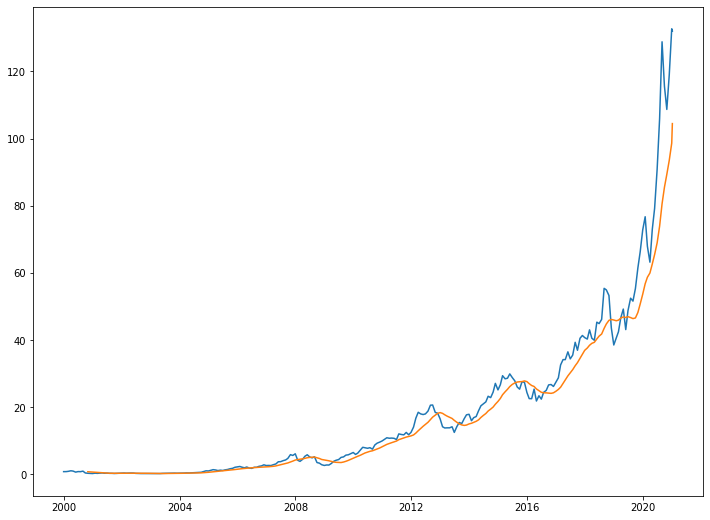

In [ ]:
# Plotting SMA vs. adj stock price
plt.figure(figsize=(12,9))
plt.plot(applmonth['date'], applmonth['5. adjusted close'])
plt.plot(applmonth['date'], applmonth['SMA11'])
plt.show()

Simple moving average with 11 months seems to produce an interesting trading strategy - buy whenever price is above SMA and sell whenever price is below SMA

### Trying out pandas_datareader library

This will ideally make it easier to try out new trading strategies

In [6]:
from datetime import datetime
import pandas_datareader.data as web

Apple SMA with panas_datareader library

In [ ]:
f = web.DataReader("AAPL", "av-monthly-adjusted", start=datetime(2000, 1, 1), end=datetime(2020, 1, 1), api_key=avkey)
f = f.reset_index()
f = f.rename(columns = {'index':'date'})
f['date'] = pd.to_datetime(f['date'], format='%Y-%m-%d')
f.head()

,date,open,high,low,close,adjusted close,volume,dividend amount
0,2000-01-31,104.87,121.50,86.50,103.75,0.7990,112099800,0.0
1,2000-02-29,104.00,119.94,97.00,114.62,0.8827,65355200,0.0
2,2000-03-31,118.56,150.38,114.00,135.81,1.0459,77663900,0.0
3,2000-04-28,135.50,139.50,104.87,124.06,0.9554,77342900,0.0
4,2000-05-31,124.87,126.25,81.75,84.00,0.6469,87569200,0.0


In [ ]:
f['SMA11'] = f.iloc[:,5].rolling(window=11).mean()

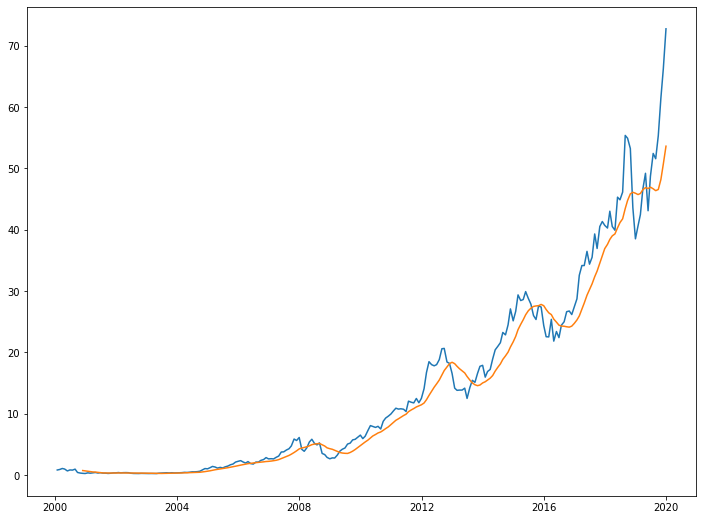

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(f['date'], f['adjusted close'])
plt.plot(f['date'], f['SMA11'])
plt.show()

## **Algorithmic Trading Strategies**

---

### Momentum Strategy

In [ ]:
# Momentum: buy stocks with a high return in the past and short sell stocks that have a low return in the past
# Specific strategy will involve looking at the past 3 weeks of a stock's performance and buying winners/losers based on past 3 week performance

# Going to use Dow Jones Industrial Average (DJIA) stocks from 2005-2010 for initial
dji = pd.read_html('https://finance.yahoo.com/quote/%5EDJI/components/')[0]
djitickers = list(dji['Symbol'])

In [ ]:
# Getting DGIA stock data for 2010-2015
start = datetime(2010, 1, 1)
end = datetime(2015, 1, 1)

djidata = web.DataReader(djitickers, "yahoo", start=start, end=end)
djidata = djidata['Adj Close']
djidata = djidata.drop(columns=['DOW'])

/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DOW', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [ ]:
# Finding percent change on a weekly basis of DJIA data
pct_change = djidata.pct_change()
weekly_ret = pct_change.resample('W').agg(lambda x:(x+1).prod()-1)

In [ ]:
weekly_ret.head()

Symbols,DIS,NKE,INTC,IBM,CAT,AMGN,CVX,WMT,JNJ,PG,HON,HD,VZ,MMM,AXP,MCD,MSFT,GS,CSCO,UNH,JPM,V,BA,CRM,TRV,KO,MRK,AAPL,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-10,-0.005925,0.005662,-0.002394,-0.012080,0.030572,-0.016459,0.005186,-0.016596,-0.007266,-0.011125,0.043866,0.010813,-0.032185,0.015659,0.029638,-0.014973,-0.009370,0.007106,-0.001215,0.037107,0.042707,-0.012934,0.096476,-0.008955,-0.025095,-0.033134,0.018644,-0.009485,-0.008311
2010-01-17,-0.040150,-0.020237,-0.001440,0.007107,0.003152,-0.009160,-0.003020,0.006563,0.005451,0.006287,0.012108,-0.014148,-0.036850,-0.011267,0.010489,0.007115,0.006523,-0.052206,-0.010543,0.032110,-0.022381,-0.009885,-0.012662,-0.074444,0.004736,0.020670,0.046950,-0.028541,-0.010544
2010-01-24,-0.020261,-0.021898,-0.042789,-0.047655,-0.097638,0.006222,-0.058564,-0.013785,-0.021065,-0.001265,-0.064508,-0.029751,-0.007849,-0.022670,-0.089644,0.017823,-0.061568,-0.067127,-0.058607,-0.017481,-0.103480,-0.039587,-0.050148,-0.059595,-0.009838,-0.036418,-0.015202,-0.039722,-0.016666
2010-01-31,-0.014343,0.012226,-0.025615,-0.024781,-0.037050,0.033216,-0.033114,0.009256,-0.005380,0.020560,-0.031093,0.010462,-0.030323,-0.012150,-0.024099,-0.015144,-0.026934,-0.035038,-0.021768,-0.004826,-0.005618,-0.008461,0.048987,-0.015339,0.048851,0.000184,-0.017752,-0.028774,0.001667
2010-02-07,-0.000338,-0.032157,0.011636,0.009233,-0.009380,-0.013680,-0.013034,0.000375,-0.003500,-0.004062,-0.030279,-0.001071,-0.023113,-0.024227,0.005045,0.015057,-0.005678,0.036579,0.054740,-0.013939,-0.016436,0.006461,-0.029724,-0.023131,-0.007697,-0.021383,-0.037978,0.017703,-0.076005


In [ ]:
# Rolling window to find returns over the past 3 weeks for any point in time
import numpy as np

past_3 = (weekly_ret+1).rolling(3).apply(np.prod)-1

In [ ]:
past_3.head()

Symbols,DIS,NKE,INTC,IBM,CAT,AMGN,CVX,WMT,JNJ,PG,HON,HD,VZ,MMM,AXP,MCD,MSFT,GS,CSCO,UNH,JPM,V,BA,CRM,TRV,KO,MRK,AAPL,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-24,-0.065170,-0.036266,-0.046456,-0.052473,-0.067120,-0.019404,-0.056539,-0.023787,-0.022882,-0.006167,-0.011649,-0.033136,-0.075165,-0.018550,-0.052831,0.009716,-0.064297,-0.109545,-0.069664,0.051697,-0.086114,-0.061380,0.028302,-0.137396,-0.030115,-0.049088,0.050257,-0.075978,-0.035121
2010-01-31,-0.073086,-0.029976,-0.068651,-0.064654,-0.128332,0.030121,-0.092488,0.001875,-0.021025,0.025677,-0.082621,-0.033471,-0.073386,-0.045422,-0.102265,0.009541,-0.080887,-0.146807,-0.088808,0.009174,-0.128469,-0.057126,-0.016234,-0.142954,0.043451,-0.016319,0.012732,-0.093971,-0.025413
2010-02-07,-0.034640,-0.041777,-0.056454,-0.062680,-0.139222,0.025422,-0.101603,-0.004284,-0.029740,0.015129,-0.121041,-0.020651,-0.060170,-0.057935,-0.107101,0.017502,-0.092028,-0.066884,-0.028689,-0.035852,-0.123168,-0.041560,-0.033234,-0.095439,0.030539,-0.056848,-0.069420,-0.050842,-0.089890


In [ ]:
from dateutil.relativedelta import relativedelta

# Finding the results of the previous 3 weeks' returns to determine which stocks to buy/short sell
formation = datetime(2015, 1, 4) # Date we're making the portfolio
prev = formation-relativedelta(weeks=1)
results = pd.DataFrame(past_3.loc[prev])

In [ ]:
# Binning our returns to determine our "winners" (which we buy) and "losers" (which we short sell)
results['bin'] = pd.qcut(results.iloc[:,0], q=5, labels=False)
winners = results[results['bin'] == 4].reset_index()['Symbols'].tolist()
losers = results[results['bin'] == 0].reset_index()['Symbols'].tolist()
print("Winners: ", winners)
print("Losers: ", losers)

Winners:  ['WMT', 'PG', 'HD', 'CSCO', 'CRM', 'WBA']
Losers:  ['NKE', 'CAT', 'AMGN', 'JNJ', 'MCD', 'MRK']


In [ ]:
# Finding the profit of the momentum strategy gave good returns

winprofit = weekly_ret.loc[formation, weekly_ret.columns.isin(winners)].mean()
loseprofit = weekly_ret.loc[formation, weekly_ret.columns.isin(losers)].mean()
profit = winprofit - loseprofit

In [ ]:
profit

0.0037210041354374303

Profit is around 0.4%, so not terrible for the week (?) - more testing required and possible modifications to the implementation are required

### Money Flow Index (MFI) Strategy

Also known as volume-weighted RSI


*   MFI > 80: Overbought (sell)
*   MFI < 20: Oversold (buy)



In [1]:
# Trying AlphaVantage API
from utility import av_call
import pandas as pd
import algorithms.mfi as mfi

In [2]:
x = mfi.MFI(20, 80, 14, ['IBM'])
x.get_signals()

([], [])

In [4]:
params = {
    'symbol' : 'IBM',
    'interval' : 'daily',
    'time_period' : '14'
}
x  = av_call('MFI', params)

In [8]:
df = pd.DataFrame(x['Technical Analysis: MFI']).T.reset_index().iloc[::-1]


In [10]:
df['index'] = pd.to_datetime(df['index'])
df = df.set_index('index')

In [14]:
df['MFI'][-1]

'62.0533'

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
tsla = web.DataReader("IBM", "yahoo", start="2010-10-01", end="2021-01-11")
tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-10-01,136.279999,135.089996,135.509995,135.639999,5621200.0,97.427666
2010-10-04,135.919998,134.389999,135.229996,135.250000,4059900.0,97.147552
2010-10-05,137.899994,136.119995,136.179993,137.660004,6202500.0,98.878593
2010-10-06,137.960007,136.830002,136.880005,137.839996,4783000.0,99.007896
2010-10-07,138.880005,137.520004,137.919998,138.720001,6440800.0,99.639977
...,...,...,...,...,...,...
2021-01-05,126.680000,124.610001,125.010002,126.139999,6114600.0,126.139999
2021-01-06,131.880005,126.720001,126.900002,129.289993,7956700.0,129.289993
2021-01-07,130.460007,128.259995,130.039993,128.990005,4507400.0,128.990005


In [19]:
# Plotting stock price over time
plt.plot(tsla['Adj Close'])

NameError: name 'plt' is not defined

In [20]:
# Calculatig typical price 
tsla['typicalprice'] = (tsla['Close'] + tsla['High'] + tsla['Low'])/3

In [21]:
# Calculate money flow
period = 14
tsla['money_flow'] = tsla['typicalprice'] * tsla['Volume']

In [22]:
# Get positive and negative money flows
positive_flow = []
negative_flow = []


for i in range(1, len(tsla)):
  if tsla['typicalprice'][i] > tsla['typicalprice'][i-1]:
    positive_flow.append(tsla['money_flow'][i-1])
    negative_flow.append(0)
  elif tsla['typicalprice'][i] < tsla['typicalprice'][i-1]:
    positive_flow.append(0)
    negative_flow.append(tsla['money_flow'][i-1])
  else:
    positive_flow.append(0)
    negative_flow.append(0)

In [23]:
# Get all of the positive and negative money flows within the time period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i+1-period : i+1]))

for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i+1-period : i+1]))

In [25]:
# Calculate money flow index
import numpy as np
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))

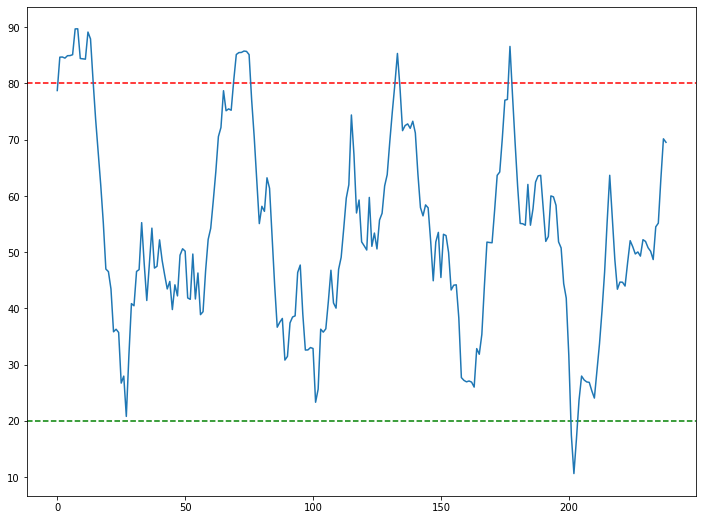

In [ ]:
# Visually show MFI
plt.figure(figsize=(12,9))
plt.axhline(20, ls='--', color='green')
plt.axhline(80, ls='--', color='red')
plt.plot(mfi)

In [27]:
new_tsla = tsla[period:]
new_tsla['MFI'] = mfi
new_tsla.tail()

,High,Low,Open,Close,Volume,Adj Close,typicalprice,money_flow,MFI
Date,,,,,,,,,
2021-01-05,126.680000,124.610001,125.010002,126.139999,6114600.0,126.139999,125.810000,7.692778e+08,67.330046
2021-01-06,131.880005,126.720001,126.900002,129.289993,7956700.0,129.289993,129.296666,1.028775e+09,67.940157
2021-01-07,130.460007,128.259995,130.039993,128.990005,4507400.0,128.990005,129.236669,5.825214e+08,57.062640
2021-01-08,129.320007,126.980003,128.570007,128.529999,4676200.0,128.529999,128.276670,5.998474e+08,56.973137
2021-01-11,129.679993,127.660004,127.949997,128.580002,5601900.0,128.580002,128.639999,7.206284e+08,57.628223


In [ ]:
def get_signals(data, low, high):
  buy = []
  sell = []
  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy.append(np.nan)
      sell.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy.append(data['Close'][i])
      sell.append(np.nan)
    else:
      buy.append(np.nan)
      sell.append(np.nan)
  return (buy, sell)

In [ ]:
# Getting points where to buy and sell
buy, sell = get_signals(new_tsla, 20, 80)
new_tsla['Buy'] = buy
new_tsla['Sell'] = sell

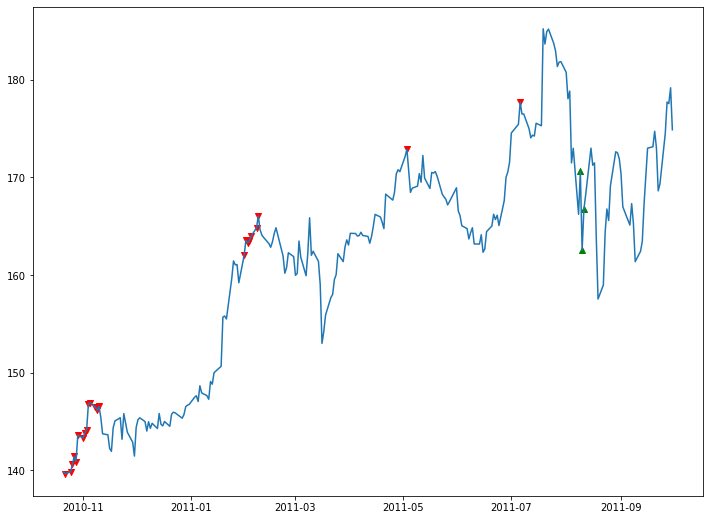

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(new_tsla['Close'])
plt.scatter(new_tsla.index, new_tsla['Buy'], marker='^', color='green')
plt.scatter(new_tsla.index, new_tsla['Sell'], marker='v', color='red')

Decent results with MFI, I can imagine it breaking down during a consistent one-directional trend (always decreasing or always increasing price).

Further analysis: MFI strategy seems to be pretty good at finding good buy points, but tends to overdo it with the sell signals at times, and the sell signals aren't always optimal.

### Moving Average Convergence/Divergence (MACD) Strategy
* MACD line crosses above signal line: Good time to buy
* MACD line crosses below signal line: Good time to sell


In [ ]:
twtr = web.DataReader('TWTR', "yahoo", start='2012-01-01', end='2014-07-01')


In [ ]:
twtr.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-11-07,50.090000,44.000000,45.099998,44.900002,117701600,44.900002
2013-11-08,46.939999,40.689999,45.930000,41.650002,27925300,41.650002
2013-11-11,43.000000,39.400002,40.500000,42.900002,16113900,42.900002
2013-11-12,43.779999,41.830002,43.660000,41.900002,6316700,41.900002
2013-11-13,42.869999,40.759998,41.029999,42.599998,8688300,42.599998


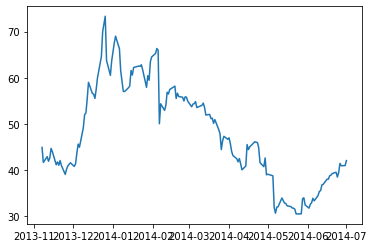

In [ ]:
plt.plot(twtr['Adj Close'])

In [ ]:
# Make 12-period and 26-period EMA's
twtr['EMA12'] = twtr['Adj Close'].ewm(span=12, adjust=False).mean()
twtr['EMA26'] = twtr['Adj Close'].ewm(span=26, adjust=False).mean()

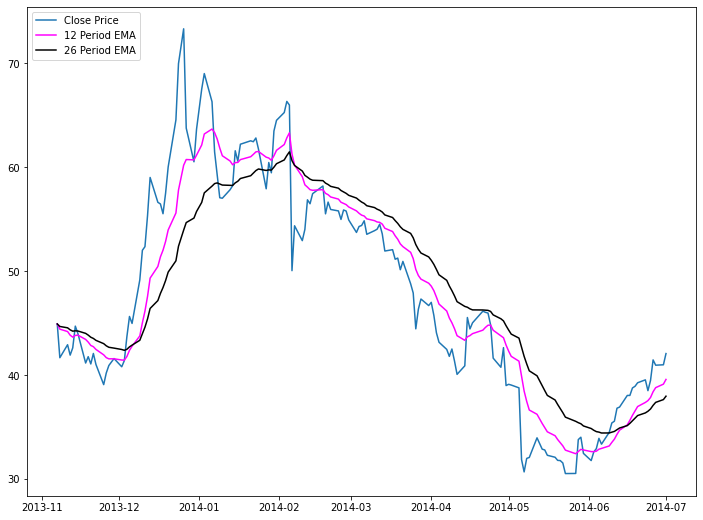

In [ ]:
# Plot EMA's compared to stock price 
plt.figure(figsize=(12,9))
plt.plot(twtr['Adj Close'], label='Close Price')
plt.plot(twtr['EMA12'], label='12 Period EMA', color='magenta')
plt.plot(twtr['EMA26'], label='26 Period EMA', color='black')
plt.legend(loc='upper left')

In [ ]:
# Generating MACD
twtr['MACD'] = twtr['EMA12']-twtr['EMA26']

In [ ]:
# Generating MACD signal line
twtr['MACD Signal'] = twtr['MACD'].ewm(span=9, adjust=False).mean()

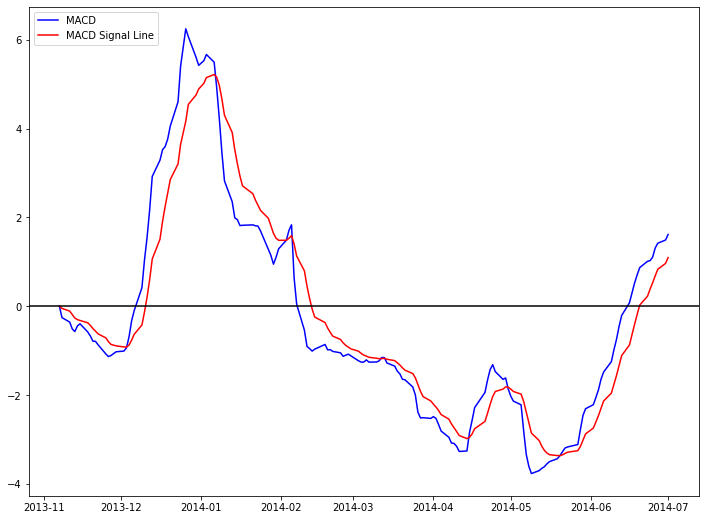

In [ ]:
# Plotting MACD vs. MACD Singal Line
plt.figure(figsize=(12,9))
plt.plot(twtr['MACD'], label='MACD', color='blue')
plt.plot(twtr['MACD Signal'], label='MACD Signal Line', color='red')
plt.axhline(0, color='black')
plt.legend(loc='upper left')

In [ ]:
# Writing functions to get MACD signal
def get_macd_signals(data):
  bought = False
  buy = []
  sell = []
  for i in range(len(data)):
    if data['MACD'][i] > data['MACD Signal'][i] and not bought:
      bought = True
      buy.append(data['Adj Close'][i])
      sell.append(np.nan)
    elif data['MACD'][i] < data['MACD Signal'][i] and bought:
      bought = False
      buy.append(np.nan)
      sell.append(data['Adj Close'][i])
    else:
      buy.append(np.nan)
      sell.append(np.nan)
  return (buy, sell)

In [ ]:
# Getting buy and sell signals for the stock data
buy, sell = get_macd_signals(twtr)
twtr['Buy'] = buy
twtr['Sell'] = sell

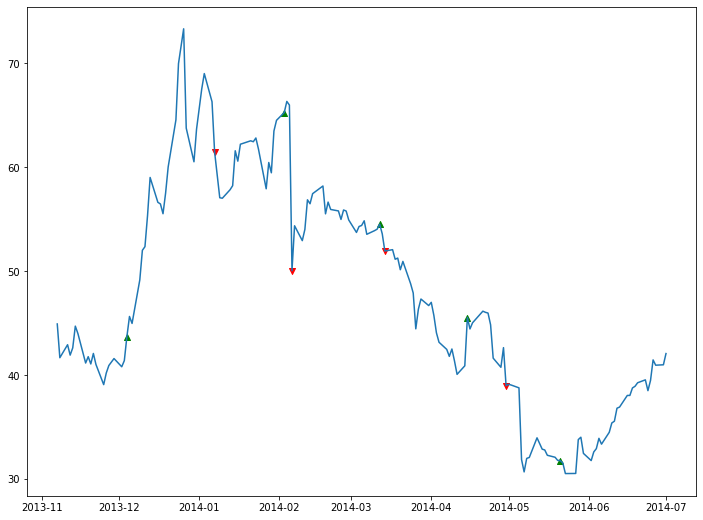

In [ ]:
# Plotting buy and sell signals compared to cost
plt.figure(figsize=(12,9))
plt.plot(twtr['Adj Close'])
plt.scatter(twtr.index, twtr['Buy'], marker='^', color='green')
plt.scatter(twtr.index, twtr['Sell'], marker='v', color='red')

MACD Provides a somewhat decent trading strategy - perhaps I can improve this in some ways, such as simultaneous holdings (don't have to sell before buying again) or changing the thresholds for the moving average from 12 and 26 to different numbers (smaller for more precision - ?). Also, the strategy overall is not very good at dealing with situations when there is a rapid decline (or growth, for that matter) in price (high volatility). Another idea: Try using it on ETF's or another security with lower risk

### On-Balance Volume (OBV) Strategy

OBV indicator is a technical momentum indicator that uses volume flow to predict changes in stock price.

* Buy whenever OBV crosses above 20-period EMA of OBV
* Sell whenever OBV crosses below 20-period EMA of OBV

In [ ]:
amzn = web.DataReader("AMZN", "yahoo", start="2020-03-16", end="2020-09-21")

In [ ]:
# Look into using Alpha Vantage data 

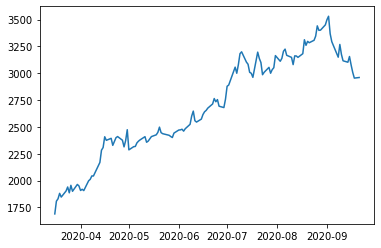

In [ ]:
plt.plot(amzn['Adj Close'])

In [ ]:
# Calculate the OBV
amzn['OBV'] = np.zeros(len(amzn))
for i in range(1, len(amzn)):
  if amzn['Adj Close'][i] > amzn['Adj Close'][i-1]:
    amzn['OBV'][i] = amzn['OBV'][i-1] + amzn['Volume'][i]
  elif amzn['Adj Close'][i] < amzn['Adj Close'][i-1]:
    amzn['OBV'][i] = amzn['OBV'][i-1] - amzn['Volume'][i]
  else:
    amzn['OBV'][i] = amzn['OBV'][i-1]

In [ ]:
# Making an EMA of the OBV
amzn['OBV_EMA']  = amzn['OBV'].ewm(span=20).mean()

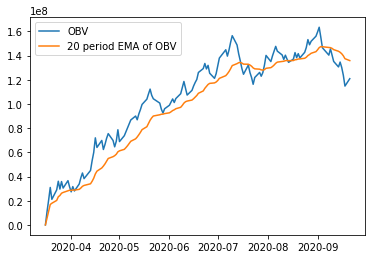

In [ ]:
plt.plot(amzn.OBV, label='OBV')
plt.plot(amzn.OBV_EMA, label='20 period EMA of OBV')
plt.legend()

In [ ]:
def gen_obv_signals(data):
  bought = False
  buy = []
  sell = []
  for i in range(len(data)):
    if data['OBV'][i] > data['OBV_EMA'][i] and not bought:
      bought = True
      buy.append(data['Adj Close'][i])
      sell.append(np.nan)
    elif data['OBV'][i] < data['OBV_EMA'][i] and bought:
      bought = False
      buy.append(np.nan)
      sell.append(data['Adj Close'][i])
      
    else:
      buy.append(np.nan)
      sell.append(np.nan)

  return (buy, sell)

In [ ]:
# Generating signals of when to buy and sell
buy, sell = gen_obv_signals(amzn)
amzn['Buy'] = buy
amzn['Sell'] = sell

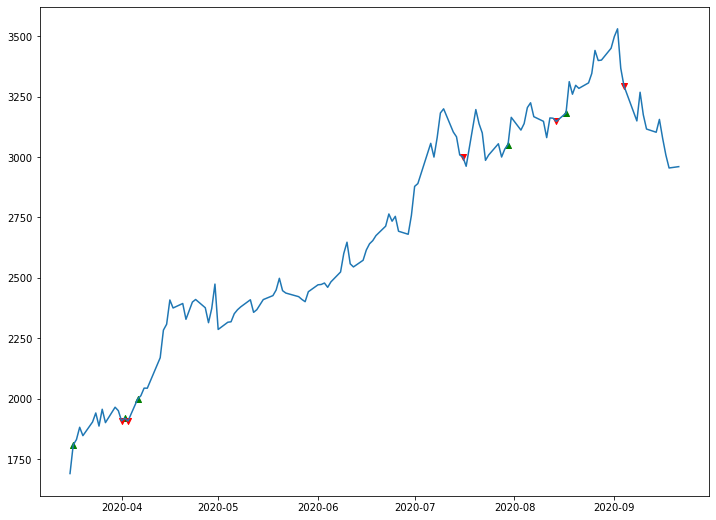

In [ ]:
# Plotting when to buy and sell to see strategy performance
plt.figure(figsize=(12,9))
plt.plot(amzn['Adj Close'])
plt.scatter(amzn.index, amzn['Buy'], marker='^', color='green')
plt.scatter(amzn.index, amzn['Sell'], marker='v', color='red')

I like the performance of this strategy, especially for short-term (few month) periods. I'll need to do some more testing with it, but for now I like the returns and its (decently good) decisions.

## **Machine Learning Trading Strategies**


---





### LSTM to Predict Stock Prices



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

baba = web.DataReader('COST', "yahoo", start='2012-01-01', end='2021-01-01')
baba

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,85.080002,84.160004,84.279999,84.599998,2339500.0,65.063423
2012-01-04,84.949997,84.010002,84.669998,84.070000,2260200.0,64.655830
2012-01-05,83.639999,82.099998,83.570000,83.260002,3590500.0,64.032875
2012-01-06,83.169998,81.120003,83.169998,81.129997,3397400.0,62.394749
2012-01-09,81.000000,78.809998,80.339996,79.010002,4798300.0,60.764320
...,...,...,...,...,...,...
2020-12-24,365.339996,361.410004,361.410004,364.579987,972500.0,364.579987
2020-12-28,371.690002,365.079987,365.500000,371.059998,3207700.0,371.059998
2020-12-29,373.260010,370.260010,372.250000,372.720001,2072600.0,372.720001


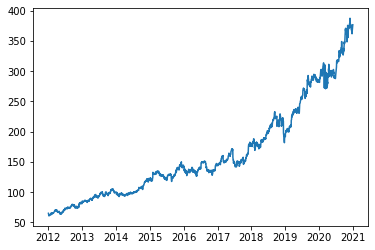

In [ ]:
# Plotting Alibaba Stock Close Price over time
plt.plot(baba['Adj Close'])

In [ ]:
# Getting the data for our model (just the adjusted close price vakyes)
data = baba.filter(['Adj Close']).values

In [ ]:
# Scaling our data to be between 0 and 1 (normalizing)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.01315532],
       [0.01190808],
       [0.01000183],
       ...,
       [0.95458937],
       [0.95988324],
       [0.96701303]])

In [ ]:
# Splitting data into training sets
trainsplit = round(len(scaled_data)*0.8) # 80% of our data will be used for training

total_traindata = scaled_data[:trainsplit]

x_train = []
y_train = []

for i in range(120, len(total_traindata)):
  x_train.append(total_traindata[i-120:i])
  y_train.append(total_traindata[i])



In [ ]:
# Converting to numpy arrays and reshaping to allow training
# (LSTM expects 3D data - samples, timesteps, features)
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # One feature

In [ ]:
# Building LSTM model
model = Sequential()

model.add(LSTM(60, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(60))
model.add(Dense(30))
model.add(Dense(1))

In [ ]:
# Compile LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train model
model.fit(x_train, y_train, batch_size=25, epochs=5)

Epoch 1/5
68/68 [==============================] - 10s 102ms/step - loss: 0.0150
Epoch 2/5
68/68 [==============================] - 7s 102ms/step - loss: 1.5159e-04
Epoch 3/5
68/68 [==============================] - 7s 104ms/step - loss: 1.4247e-04
Epoch 4/5
68/68 [==============================] - 7s 105ms/step - loss: 1.3894e-04
Epoch 5/5
68/68 [==============================] - 7s 104ms/step - loss: 1.3179e-04


In [ ]:
# Building testing sets

total_testdata = scaled_data[trainsplit-120:]

x_test = []
y_test = data[trainsplit:]

for i in range(120, len(total_testdata)):
  x_test.append(total_testdata[i-120:i])

In [ ]:
# Reshaping
x_test = np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Making predictions on test data with model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Unscaling values

In [ ]:
# Get root mean squared error to determine accuracy of model
mean_squared_error(y_test, predictions, squared=False)

7.43589007454176

Pretty decently low root mean squared error

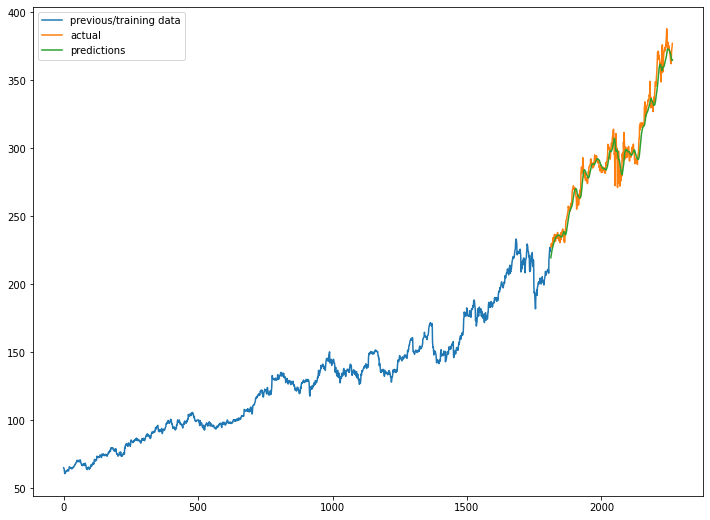

In [ ]:
# Plotting our predictions vs. actual data to visualize how good we performed

train = data[:trainsplit]
valid = data[trainsplit:]
plt.figure(figsize=(12,9))
plt.plot(range(train.shape[0]), train, label='previous/training data')
plt.plot(range(train.shape[0], train.shape[0]+valid.shape[0]) ,valid, label='actual')
plt.plot(range(train.shape[0], train.shape[0]+valid.shape[0]) ,predictions, label='predictions')
plt.legend()